# Numerical root finding

Root finding is one of the most common approaches used for the scientific computing from predicting the migration pattern of birds to simple distribution of a chemical between two different medias.  

Let's start simple. 

## E1: 

We have *f(x) = 5x +3* and we would like to find its root. 
    1. How can we solve this equation? 
    2. What are we actually solving?

> **Answers to E1**
> 
> 1. Here we are setting *f(x) = 0*, resulting in *x = 3/5*. 
>
> 2. We are solving the system of two equations: *f(x) = 0* and *f(x) = 5x +3*

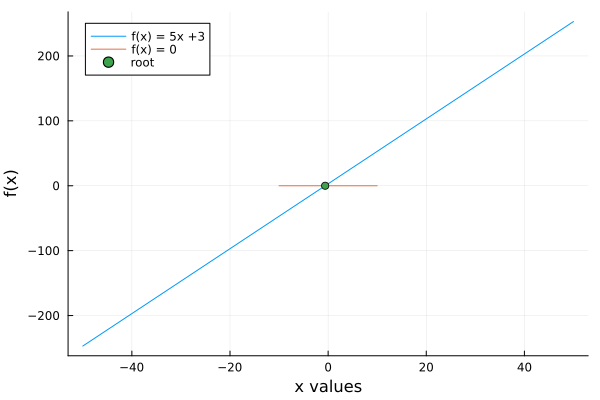

In [1]:
using DataSci4Chem

x = collect(-50:0.1:50)
f(x) = (5 .* x) .+ 3

r = -3/5

plot(x,f(x),label = "f(x) = 5x +3", xlabel = "x values", ylabel = "f(x)")
plot!([-10,10],[0,0],label = "f(x) = 0")
scatter!([r],[0],label = "root")


## E2: 

Now that we know how to solve simple first order polynomials. We can expand this to something a bit more complex, for example a second order polynomial. Let's try to solve *f(x) = ax^2 + bx + c*. 

*f(x) = ax^2 + bx + c*
*f(x) = 0 

We can use the blow equation to solve such systems. 

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$ 

Looking at this equation there are three scenarios:  

1. The system has two real solutions/roots, thus *a $\neq$ 0* and *b^2 $\geq$ 4ac. 
2. The system has one real solution, thus *a $\neq$ 0* and *x = -b/2a*. 
3. The system does not have a real solution.  

## E3: 

What does each of the above cases mean? Can you make an example for each case and plot them?

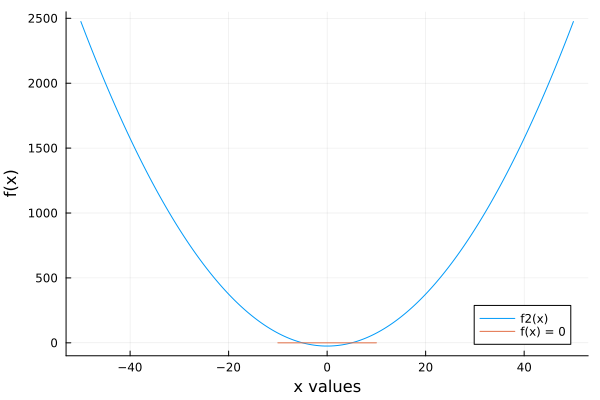

In [2]:
# System with two 

f2(x) = x.^2 .- 25 

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-10,10],[0,0],label = "f(x) = 0")

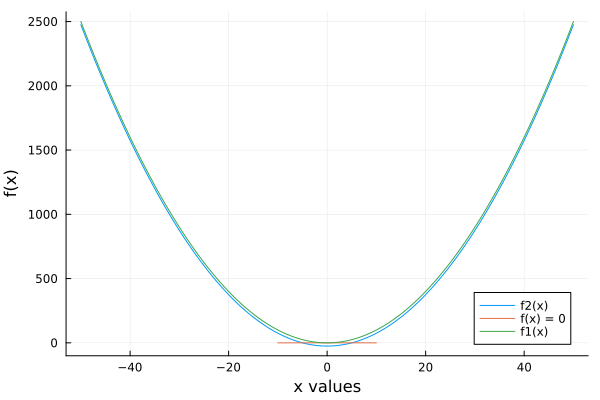

In [3]:
# Single solution 

f1(x) = x.^2 

plot!(x,f1(x),label = "f1(x)",xlabel = "x values", ylabel = "f(x)")

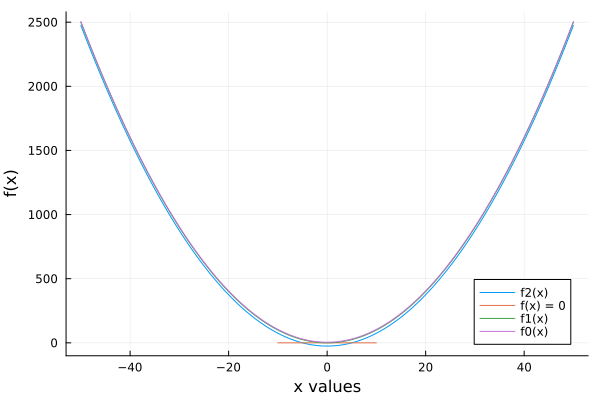

In [4]:
# No real solution 

f0(x) = x.^2 .+ 5

plot!(x,f0(x),label = "f0(x)",xlabel = "x values", ylabel = "f(x)")

What if we are not able to so easily solve the equation to find its roots or maybe we are dealing with a multivariate system? To solve such cases you can take advantage of numerical methods. One of the most famous methods for such calculations is [Newton method](https://en.wikipedia.org/wiki/Newton%27s_method). 

## Newton's Method

This method is an iterative approach which uses a combination of function and the the first derivative evaluations to get closer to the true root of a function over each iteration. 

## E4: 

Calculate the first derivative of *``f(x) = x^2 - 25``*. What does the first derivative of *f(x)* (i.e. *f'(x)*) represent? 

> **Answers to E4**
> 
> The first derivative of the above function is *``f'(x) = 2x``*. The first derivative of this function represents the slope/tangent of the function at each point. 

## E5: 

The *f'(x)* generates one number. How can you use this for the slope of your function?

> **Answers to E5**
> 
> The slope line of the *f(x)* at each point is the line between *f(x)* and the intercept of the *f'(x)*.
>
> $ f'(x_n) = \frac{f(x_n) - 0}{x_n - x_{n+1}}$

## E6: 

Let's calculate the intercept of the slope line. Please plot your results for *x_n = 0.5*. 

> **Answers to E6**
> 
> We can calculate the intercept by rearranging the above equation. 
> $ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

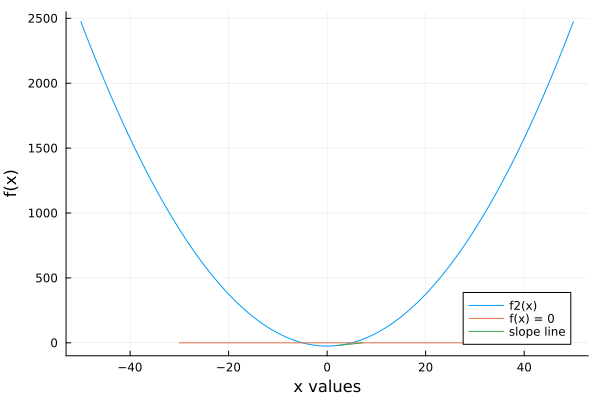

In [9]:

x_n = 2

df2(x) = 2 .* x 

x_n1(x) = x - f2(x)/df2(x)
x_n1(x_n)

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
plot!([x_n, x_n1(x_n)],[f2(x_n),0],label = "slope line")

#xlims!(0,10)

## E7:

What if we use the intercept of the slope line as the new estimate of the root (i.e. *x_n*). How would the new slope line look?

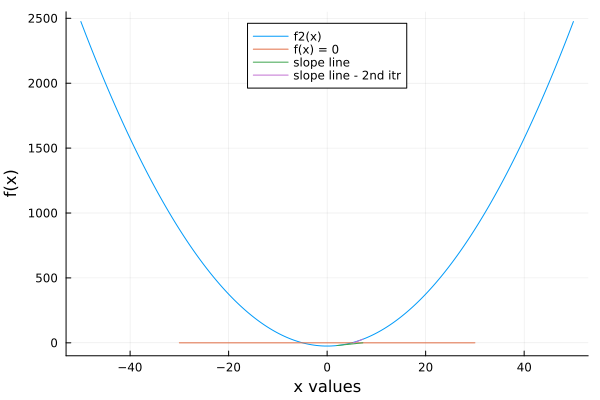

In [10]:

x_n2 = x_n1(x_n)

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
plot!([x_n, x_n1(x_n)],[f2(x_n),0],label = "slope line")
plot!([x_n1(x_n), x_n1(x_n2)],[f2(x_n2),0],label = "slope line - 2nd itr",legend = :top)

## E8: 

What if we repeat this process more times? How would the slop line look in the next iteration?

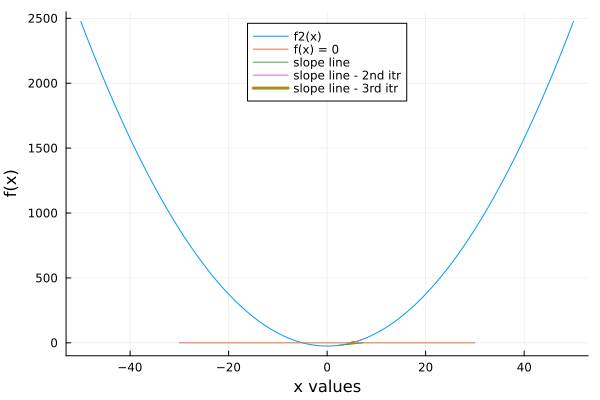

In [11]:
x_n3 = x_n1(x_n2)

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
plot!([x_n, x_n1(x_n)],[f2(x_n),0],label = "slope line")
plot!([x_n1(x_n), x_n1(x_n2)],[f2(x_n2),0],label = "slope line - 2nd itr")
plot!([x_n1(x_n2), x_n1(x_n3)],[f2(x_n3),0],label = "slope line - 3rd itr",legend = :top,lw = 3)

As you can see, over each iteration we get closer and closer to the true root of the function. 

## E9: 

How would you decide the found root is good enough? How will you stop such as algorithm? 

> **Answers to E9**
> 
> For any iterative algorithm usually a combination of maximum number of iterations and accuracy threshold (i.e. error tolerance) is used for stopping such algorithms. 

## E10: 

Write a function to perform root finding using Newton method.

> **Answers to E10**
> 
> There is a function called *newton_root(-)* that can be used for this. 

## Advantages and disadvantages of Newton method

### Advantages: 
1. Fast 
2. Easy to implement 
3. Can be expanded to multivariate problems.

### Disadvantages: 
1. Need analytical derivative of the function
2. Multiple evaluations 
3. Assumes continuity 

In case the function does not have an analytical first derivative or it is very difficult to calculate, you can use [Secant method](https://en.wikipedia.org/wiki/Secant_method). 

## Secant method

This method is an extension to the conventional Newton method where rather than analytically calculating the first derivative. The *f'(x)* is estimated numerically. There are different ways of implementing this method either via numerically estimated derivative or through combining the derivative estimate and the Newton formula.

## E11:

How do you estimate the first derivative of a function *f(x)*?

> **Answer to E11**
>
> $$ f'(x) \approx \frac{f(x_n) - f(x_{n -1})}{x_n - x_{n-1}} $$
>

## E12: 

Let's calculate the slope for two iterations of the Newton method examples and plot them. 

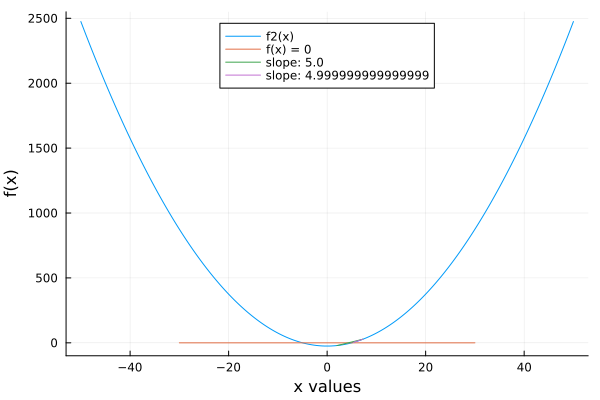

In [13]:
dfe(x,x1) = (f(x) - f(x1)) / (x - x1) 

s1 = dfe(x_n,x_n2)
s2 = dfe(x_n2,x_n3)

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)",legend=:top)
plot!([-30,30],[0,0],label = "f(x) = 0")
plot!([x_n, x_n2],[f2(x_n),f2(x_n2)],label = "slope: $s1")
plot!([x_n2, x_n3],[f2(x_n2),f2(x_n3)],label = "slope: $s2")

## E13: 

As you can clearly see these estimates of slope are not that great. How can we improve that? 

> **Answer to E13** 
>
> You can improve the slope estimates by creating smaller steps and using the below equation.
>
> $$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} $$ 
>
> where h is a small number (e.g. 0.001).

## E14: 

Let's write a function to calculate the derivative of *f(x)* over the *x*. 

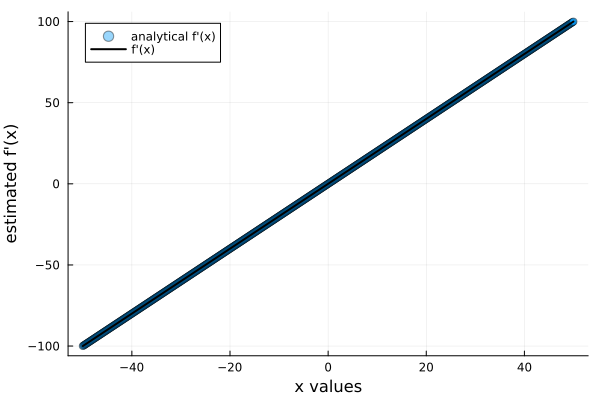

In [14]:
h = 1

df_estimate(f,x,h) = (f(x .+ h) .- f(x .- h)) ./ (2 .* h)

scatter(x,df2(x),label= "analytical f'(x)",markeralpha =0.4)
plot!(x,df_estimate(f2,x,h),label ="f'(x)",xlabel= "x values",ylabel = "estimated f'(x)",lw =2,lc = :black)


As you can see these two series match very well, indicating that you can use this function for the classical Newton method. 

## E14: 

Write a function to find the roots via Newton method without analytical first derivative of the function. 

> **Answer to E14** 
>
> You need to modify the already existing function to estimate the function derivative at specific *x*. Please note that this method may fail at the edges of the variable space.

## E15: 

What if we try to incorporate the *f'(x)* approximation into the Newton equation. 

$$ f'(x) \approx \frac{f(x_n) - f(x_{n -1})}{x_n - x_{n-1}} $$

> **Answer to E15**
>
> If we replace the *f'(x)* in the Newton equation, after a bit of simplification we will end up with the below equation. 
> $$ x_{n+1} = \frac{f(x_n)x_{n-1} - f(x_{n-1})x_n}{f(x_n) - f(x_{n -1})} $$


As you can see intuitively from the above equation, the Secant equation needs two points that could be fed to the equation. Over each iteration, the furthest point is replaced with the new estimation of the intercept of the slope line.

## E16: 

Why do we call it an estimate of the intercept rather than the actual intercept of the slope line?

> **Answer to E16**
>
> In this case we are using an approximation of the derivative function thus what we will end up with is an estimate of the slope line intercept.
> 

## E17: 

Let's use the *x_n = 0.5* and *x_n1 = -7* as our starting points for the calculation of the root of *f2(x)*.  

In [15]:
x_n = 0.5
xn1 = -7

secant_m(f,x0,x1) = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))

x_n2 = secant_m(f2,x_n,xn1)

-3.3076923076923075

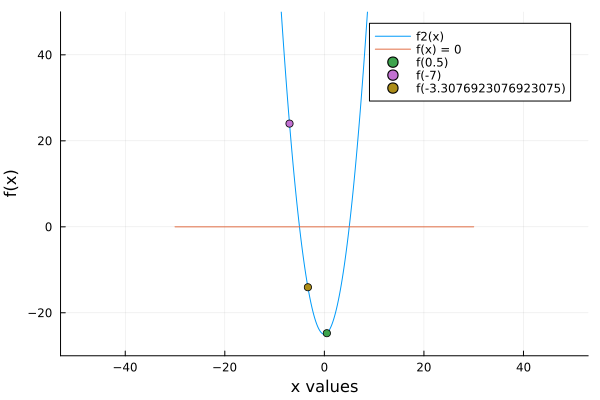

In [16]:
plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
scatter!([x_n], [f2(x_n)], label = "f($x_n)")
scatter!([xn1], [f2(xn1)], label = "f($xn1)")
scatter!([x_n2], [f2(x_n2)], label = "f($x_n2)")

ylims!(-30,50)

## E18: 

How would the next iteration look?

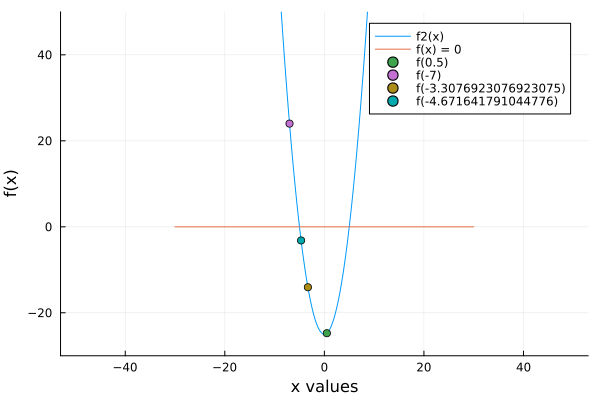

In [17]:
x_n3 = secant_m(f2,xn1,x_n2)

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
scatter!([x_n], [f2(x_n)], label = "f($x_n)")
scatter!([xn1], [f2(xn1)], label = "f($xn1)")
scatter!([x_n2], [f2(x_n2)], label = "f($x_n2)")
scatter!([x_n3], [f2(x_n3)], label = "f($x_n3)")

ylims!(-30,50)

Again you can see that over each iteration we are getting closer and closer to the true root of the function. 

## E19: 

Write a function for the Secant root finding method.

> **Answer to E19** 
>
> There is a function within the package called *secant_root(-)* that can be used for your future work.


## Advantages and disadvantages of Secant method

### Advantages:  
1. Easy to implement.
2. Robust. 


### Disadvantages: 
1. Slow (high number of iterations) 

There are other numerical methods that can be used for the numerical root finding without the need for the derivatives. However, these methods are bounded. In other words the iterative process is limited to a small window of the tested variable. One of the most important of these methods is called [Bisection method](https://en.wikipedia.org/wiki/Bisection_method).

## Bisection method

This method is a root finding strategy for a univariate function that is continuous. During the first iteration two *x* values are provided as the first guesses for the method. The algorithm then evaluates the function for these two *x* values, if the two evaluations result in values with different signs the algorithm will continue. During the second and further iterations, the window is divided in two by finding the middle of the two *x* values. In the next iteration the window that meets the different sign criterion is selected and divided further. This process is repeated until an accurate estimate of the root is achieved. 

## E20: 

Let's perform the first iteration of bisection method with *x_0 = 9* and *x_1 = -3*. 

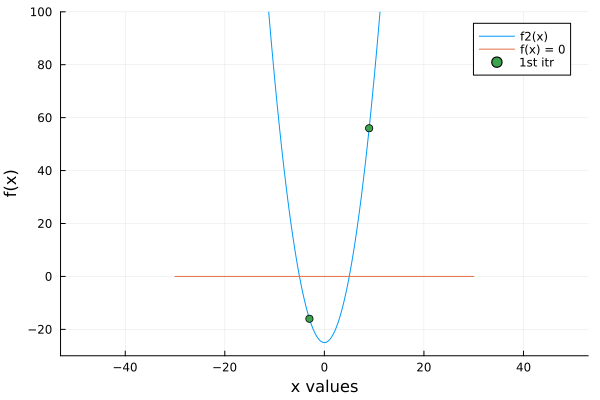

In [18]:
x_0 = 9
x_1 = -3

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
scatter!([x_0,x_1],[f2(x_0),f2(x_1)],label="1st itr")
ylims!(-30,100)

As you can see, the two points have different signs. So we can move forward with the algorithm. 

## E21:

Why do we need the values to have different signs?

> **Answer to E12**
>
> This condition guarantees that we have the root inside the set window.

## E22: 

How would the second iteration look here?

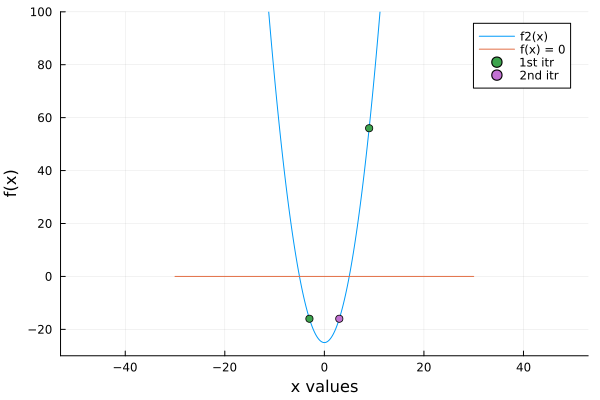

In [19]:
x_3 = DataSci4Chem.mean([x_0,x_1])

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
scatter!([x_0,x_1],[f2(x_0),f2(x_1)],label="1st itr")
scatter!([x_3],[f2(x_3)],label = "2nd itr")
ylims!(-30,100)

## E23: 

Which window would you select for the next iteration?

> **Answer to E23**
>
> The top window as the bottom window does not meet the different sign criterion. 

## E24:

Can you plot the iteration 3?

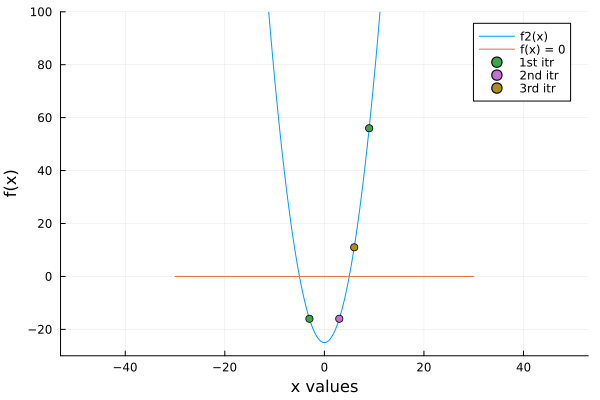

In [20]:
x_4 = DataSci4Chem.mean([x_0,x_3])

plot(x,f2(x),label = "f2(x)",xlabel = "x values", ylabel = "f(x)")
plot!([-30,30],[0,0],label = "f(x) = 0")
scatter!([x_0,x_1],[f2(x_0),f2(x_1)],label="1st itr")
scatter!([x_3],[f2(x_3)],label = "2nd itr")
scatter!([x_4],[f2(x_4)],label = "3rd itr")
ylims!(-30,100)

As you can see, over each iteration we get a better estimation of the root. 

## E25: 

Write a function to perform bisection root finding. 

> **Answer to E25**
>
> A function called *bisection_root(-)* is available via the *DataSci4Chem.jl* package.

## Advantages and disadvantages of bisection method

### Advantages:  
1. Easy to implement.
2. Robust. 


### Disadvantages: 
1. Slow (high number of iterations).
2. Univariate.
3. Knowledge of the bounds. 